In [2]:
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

from rps_simulation.rps_base import RPS_core  # Importing RPS_core class from rps_base.py
from rps_simulation.learning_curves import logistic_learning
from rps_simulation.forgetting_curves import exponential_forgetting 
from rps_simulation.practice_rate import simple_linear_rate 
from rps_simulation.waiting_times import exponential_waiting_time 

import numpy as np
import matplotlib.pyplot as plt

concave_colour = '#466be8'
sigmoid_colour = '#f77150'



np.random.seed(13)


# Interventions

We try a simple intervention where if after $t=20$ units of time, learner skill is below $S_{min_thresh} = 0.01$, we temporarily (for $t_{int} = 10$ units of time) set min. practice rate $a$ to a high value of $a_{high} = 10$ from $a = 0.2$. The intervention with some probability can work to bring the learner above the logsitic learning curve's inflection point, after which a positive outcome occurs. Sometimes the intervention fails and the learner skill may drop back down. However on a population of learners, this intervention will reduce the quitting rate. 

In [3]:
## Defining the learning, forgetting and practice functions:
log_learning = logistic_learning(alpha=0.4) # alpha is the learning rate
simple_prac_func = simple_linear_rate(a=0.2, b=5) # sample practice function
exp_forgetting = exponential_forgetting(forgetting_rate=0.2) # setting forgetting function to exponential 
starting_skill = 0.05; starting_prac_rate = 1

# Initializing the RPS_core class:
logistic_inter = RPS_core(learning_func = log_learning,
                    forgetting_func = exp_forgetting,
                    practice_rate_func = simple_prac_func,
                    waiting_time_dist = exponential_waiting_time,
                    initial_skill=starting_skill,
                    initial_practice_rate=starting_prac_rate, 
                    max_time=100)


# setting intervention parameters:
inter_param = {'S_min_thresh': 0.01, # min skill below which intervention kicks in
               'time_min_thresh': 20, # min. time before starting intervention, giving learners chance to learn on their own.  
               'a_high': 2, # high value to which a is set during intervention
               'b_high': 5, # high value to which b is set during intervention
               'time_int': 10, # min. time for which intervention is done. Intervention ends on the next practice point  
               'a_low': 0.02, # value to which a is set after intervention
               'b_low': 5 # value to which b is set after intervention
                }

# run simulation with intervention:
logistic_inter.run_sim_with_intervention(inter_param)


In [4]:
times = logistic_inter.practice_times
a_vals = logistic_inter.a_vals 
int_status = logistic_inter.int_status



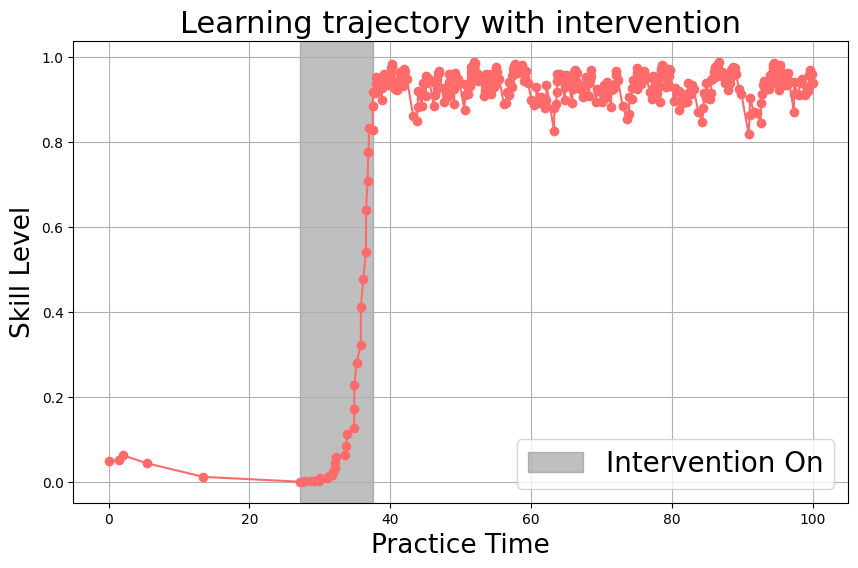

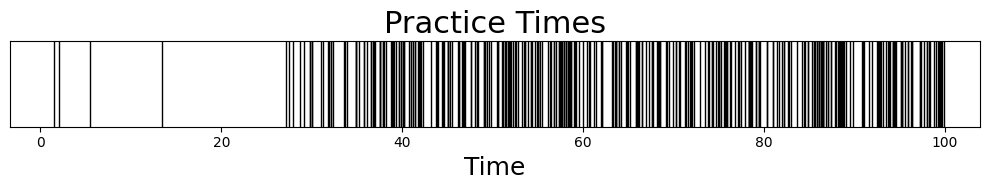

In [5]:

# simple learning trajectory with markers for practice events:
#logistic_inter.plot_simple_trajectory()
logistic_inter.plot_intervention_trajectory(save_location='../plots/log_intervention.png')

# Can also generate timestamp plots of when practice_events occured:
logistic_inter.practice_times_plot()


# # plot intervention status:
# plt.figure(figsize=(12,8), dpi=128)
# plt.step(times, a_vals, where='post')
# plt.step(times, int_status, where='post')
# plt.show()

## Trying out other intervention cases:

In [6]:
# Run intervention sim
logistic_inter.run_sim_with_intervention(inter_param)

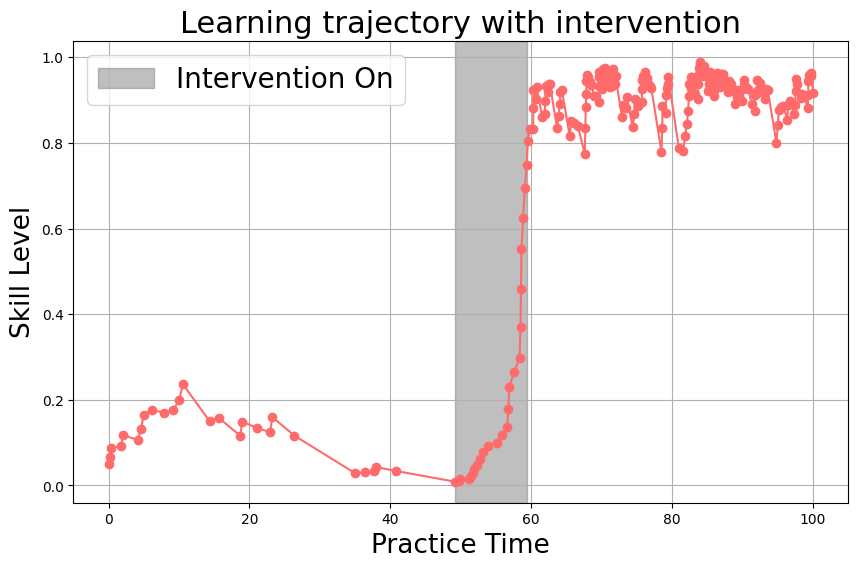

In [7]:
# plotting
logistic_inter.plot_intervention_trajectory()